In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as npr
import random

In [2]:
path = '../Dataset/Dataset.tsv'

# Read the dataset
df = pd.read_csv(path, sep='\t')

df.head()

,Study ID,Patient ID,Sample ID,Age in years,Absolute Neutrophil Count (G/L),BM Blast (%),Chromosomal Status at TP53,CNACS Called Chr Arm Gain,CNACS Called Chr Arm Loss,CNACS Called Chr Arm Upd,...,Overall Survival (Months),Overall Survival Status,PB Blast (%),Platelet (G/L),Ringed Sideroblast (%),Number of Samples Per Patient,Sex,TMB (nonsynonymous),White Blood Cell Count (G/L),WHO 2016 Classification
0,mds_iwg_2022,E-H-100000,E-H-100000-T1-1-D1-1,57.0,4.65,3.0,normal,NaN,5q,NaN,...,69.830137,0:LIVING,0.0,406.0,NaN,1,Female,23.920896,7.50,MDS-del5q
1,mds_iwg_2022,E-H-100001,E-H-100001-T1-1-D1-1,56.0,2.88,2.0,normal,NaN,5q,NaN,...,34.290411,0:LIVING,0.0,364.0,NaN,1,Female,6.523881,7.21,MDS-del5q
2,mds_iwg_2022,E-H-100002,E-H-100002-T1-1-D1-1,72.0,0.49,15.0,cnloh,NaN,5q,17p,...,3.682192,1:DECEASED,0.0,35.0,NaN,1,Female,6.523881,2.60,MDS-EB2
3,mds_iwg_2022,E-H-100004,E-H-100004-T1-1-D1-1,40.0,1.56,3.0,normal,NaN,NaN,NaN,...,62.235616,0:LIVING,0.0,708.0,NaN,1,Female,4.349254,2.55,MDS/MPN-U
4,mds_iwg_2022,E-H-100005,E-H-100005-T1-1-D1-1,45.0,1.25,2.0,normal,NaN,NaN,NaN,...,67.758904,0:LIVING,0.0,141.0,NaN,1,Female,6.523881,2.31,MDS-MLD


In [3]:
col_names = list(df.columns.values)
for col in col_names:
    print(col+'\t')
    n = len(df[col].unique())
    print(df[col].unique())
    print('total of uniques: ', n)
    print('------------------------')

Study ID	
['mds_iwg_2022']
total of uniques:  1
------------------------
Patient ID	
['E-H-100000' 'E-H-100001' 'E-H-100002' ... 'I-H-132727' 'I-H-132728'
 'I-H-132729']
total of uniques:  3323
------------------------
Sample ID	
['E-H-100000-T1-1-D1-1' 'E-H-100001-T1-1-D1-1' 'E-H-100002-T1-1-D1-1' ...
 'I-H-132727-T1-1-D1-1' 'I-H-132728-T1-1-D1-1' 'I-H-132729-T1-1-D1-1']
total of uniques:  3323
------------------------
Age in years 	
[ 57.  56.  72.  40.  45.  54.  53.  60.  59.  33.  21.  63.  58.  67.
  66.  61.  64.  29.  83.  78.  73.  79.  70.  80.  52.  95.  77.  81.
  65.  76.  82.  50.  88.  87.  74.  62.  68.  75.  48.  55.  69.  46.
  51.  71.  85.  43.  49.  92.  84.  44.  34.  37.  36.  47.  42.  23.
  19.  35.  22.  91.  28.  41.  31.  89.  30.  86.  39.  38.  26.  20.
  18.  16.  nan  32. 100.  93.  94.  90.  27.  99.  96.  97.  98.  24.
  25.  12.]
total of uniques:  86
------------------------
Absolute Neutrophil Count (G/L)	
[ 4.65  2.88  0.49 ... 42.2  12.2  40.1 ]
t

In [4]:
variables_IPSSR = ['BM Blast (%)', 'IPSS-R Cytogenetic Category', 'Hemoglobin (g/dL)', 'Platelet (G/L)', 'Absolute Neutrophil Count (G/L)', 'IPSS-R', 'IPSS-R Score', 'Overall Survival (Months)', 'Patient ID']

data = df[variables_IPSSR]

data.dropna(inplace=True)

data.head(9)

/usr/lib/python3/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,BM Blast (%),IPSS-R Cytogenetic Category,Hemoglobin (g/dL),Platelet (G/L),Absolute Neutrophil Count (G/L),IPSS-R,IPSS-R Score,Overall Survival (Months),Patient ID
0,3.0,Good,8.8,406.0,4.65,Low,3.0,69.830137,E-H-100000
1,2.0,Good,9.8,364.0,2.88,Low,2.0,34.290411,E-H-100001
2,15.0,Very-Poor,8.9,35.0,0.49,Very-High,9.5,3.682192,E-H-100002
3,3.0,Good,7.0,708.0,1.56,Int,3.5,62.235616,E-H-100004
4,2.0,Good,11.8,141.0,1.25,Very-Low,1.0,67.758904,E-H-100005
6,2.0,Good,8.8,352.0,1.52,Low,2.0,33.501370,E-H-100007
7,1.0,Good,10.9,579.0,3.41,Very-Low,1.0,41.293151,E-H-100008
8,9.0,Very-Good,7.6,26.0,0.86,Int,4.5,38.531507,E-H-100009
9,16.0,Very-Poor,8.7,113.0,0.28,Very-High,8.5,12.032877,E-H-100010


## Compute the IPSS-R

In [5]:
# BM Blast (%) points
def compute_BM_points(column):
    points = []
    for value in column:
        if value <= 2:
            points.append(0)
        elif 2 < value < 5:
            points.append(1)
        elif 5 <= value <= 10:
            points.append(2)
        else:
            points.append(3)
    return points

BM_points = compute_BM_points(data['BM Blast (%)'])

In [6]:
# Hemoglobin (g/dL) points
def compute_Hemog_points(column):
    points = []
    for value in column:
        if value >= 10:
            points.append(0)
        elif 8 <= value < 10:
            points.append(1)
        else:
            points.append(1.5)
    return points

Hemog_points = compute_Hemog_points(data['Hemoglobin (g/dL)'])

In [7]:
# Platelet (G/L) points
def compute_Platelet_points(column):
    points = []
    for value in column:
        if value >= 100:
            points.append(0)
        elif 50 <= value < 100:
            points.append(0.5)
        else:
            points.append(1)
    return points

Platelet_points = compute_Platelet_points(df['Platelet (G/L)'])

In [8]:
# Absolute Neutrophil Count (G/L) points
def compute_ANC_points(column):
    points = []
    for value in column:
        if value >= 0.8:
            points.append(0)
        else:
            points.append(0.5)
    return points

ANC_points = compute_ANC_points(df['Absolute Neutrophil Count (G/L)'])

In [9]:
def compute_cytogenetics_points(column):
    points = []
    for value in column:
        if value == 'Very-Good':
            points.append(0)
        elif value == 'Good':
            points.append(1)
        elif value == 'Int':
            points.append(2)
        elif value == 'Poor':
            points.append(3)
        else:
            points.append(4)
    return points

cytogenetics_points = compute_cytogenetics_points(data['IPSS-R Cytogenetic Category'])

print(cytogenetics_points)


[1, 1, 4, 1, 1, 1, 1, 0, 4, 1, 1, 1, 4, 2, 2, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 1, 4, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 2, 2, 1, 1, 3, 4, 1, 1, 1, 2, 4, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 4, 2, 1, 1, 1, 1, 4, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 4, 1, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 1, 4, 4, 1, 1, 1, 3, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 2, 1, 1, 1, 3, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 4, 1, 1, 1, 4, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [10]:
def risk_IPSSR(array1, array2, array3, array4, array5):
    res = []
    sums = []
    for value1, value2, value3, value4, value5 in zip(array1, array2, array3, array4, array5):
        sums.append(value1 + value2 + value3 + value4 + value5)
    for sum in sums:
        if sum <= 1.5:
            res.append('Very Low')
        elif 1.5 < sum <= 3:
            res.append('Low')
        elif 3 < sum <= 4.5:
            res.append('Intermediate')
        elif 4.5 < sum <= 6:
            res.append('High')
        elif sum > 6:
            res.append('Very High')
    return res

risks = risk_IPSSR(BM_points, Hemog_points, Platelet_points, ANC_points, cytogenetics_points)

print(risks)

#print unique values of risks
print(set(risks))

['Low', 'Low', 'Very High', 'Intermediate', 'Very Low', 'Low', 'Very Low', 'Intermediate', 'Very High', 'Low', 'Low', 'Intermediate', 'Intermediate', 'Very High', 'Very High', 'Very High', 'High', 'High', 'High', 'Intermediate', 'Low', 'Intermediate', 'Very High', 'High', 'Low', 'Very Low', 'Intermediate', 'Intermediate', 'Intermediate', 'Very High', 'Low', 'Low', 'Very Low', 'Very Low', 'Low', 'Very Low', 'Very High', 'Low', 'High', 'High', 'Low', 'Intermediate', 'High', 'Low', 'Very Low', 'High', 'High', 'Very Low', 'High', 'High', 'Very Low', 'Low', 'Very Low', 'Low', 'Very Low', 'Intermediate', 'Very Low', 'Low', 'Very High', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Intermediate', 'Very Low', 'Low', 'Very Low', 'Low', 'Low', 'High', 'Intermediate', 'Very Low', 'High', 'Intermediate', 'Intermediate', 'Very Low', 'Very High', 'High', 'High', 'Low', 'Low', 'Intermediate', 'Intermediate', 'High', 'Low', 'Low', 'Low', 'Very Low', 'Intermediate', 'Low', 'Low', 'Low', 'Low', 'High',

In [145]:
# get pais of 'Overall Survival (Months)' and 'IPSS-R Score' by the value of 'IPSS-R'
def get_ID_patient_list(df, label, value):
    list_ID = []
    for index, row in df.iterrows():
        if row[label] == value:
            list_ID.append(row['Patient ID'])
    return list_ID

very_low = get_ID_patient_list(data, 'IPSS-R', 'Very-Low')
low = get_ID_patient_list(data, 'IPSS-R', 'Low')
intermediate = get_ID_patient_list(data, 'IPSS-R', 'Int')
high = get_ID_patient_list(data, 'IPSS-R', 'High')
very_high = get_ID_patient_list(data, 'IPSS-R', 'Very-High')

number_verylow_alive_start = 482
number_verylow_alive_end = 0
number_low_alive_start = 1086
number_low_alive_end = 0
number_intermediate_alive_start = 632
number_intermediate_alive_end = 0
number_high_alive_start = 440
number_high_alive_end = 0
number_veryhigh_alive_start = 360
number_veryhigh_alive_end = 0

print('Very Low Alive: ', number_verylow_alive_start)
print('Low Alive: ', number_low_alive_start)
print('Intermediate Alive: ', number_intermediate_alive_start)
print('High Alive: ', number_high_alive_start)
print('Very High Alive: ', number_veryhigh_alive_start)


Very Low Alive:  482
Low Alive:  1086
Intermediate Alive:  632
High Alive:  440
Very High Alive:  360


In [146]:
# get the time of survival of each patient in each risk group
def get_time_survival(df, list_ID):
    list_time = []
    list_status = []
    for index, row in df.iterrows():
        if row['Patient ID'] in list_ID:
            list_time.append(row['Overall Survival (Months)'])
    for index, row in df.iterrows():
        if row['Patient ID'] in list_ID:
            list_status.append(row['Overall Survival Status'])
    return list_time, list_status

very_low_time, very_low_status = get_time_survival(df, very_low)
low_time, low_status = get_time_survival(df, low)
intermediate_time, intermediate_status = get_time_survival(df, intermediate)
high_time, high_status = get_time_survival(df, high)
very_high_time, very_high_status = get_time_survival(df, very_high)

print('Very Low Time: ', very_low_time)
print('Very Low Status: ', very_low_status)
print('Low Time: ', low_time)
print('Low Status: ', low_status)
print('Intermediate Time: ', intermediate_time)
print('Intermediate Status: ', intermediate_status)
print('High Time: ', high_time)
print('High Status: ', high_status)
print('Very High Time: ', very_high_time)
print('Very High Status: ', very_high_status)

Very Low Time:  [67.75890411, 41.29315068, 35.76986301, 82.94794521, 159.4849315, 74.53150685, 71.96712329, 71.86849315, 34.09315068, 5.720547945, 60.49315068, 20.02191781, 2.95890411, 50.6630137, 46.15890411, 28.33972603, 51.94520548, 43.7260274, 40.99726027, 35.57260274, 28.63561644, 27.51780822, 22.02739726, 11.83561644, 7.495890411, 1.578082192, 10.58630137, 64.73424658, 45.6, 66.37808219, 35.83561644, 9.567123288, 31.7260274, 9.435616438, 0.0, 30.54246575, 64.30684932, 34.81643836, 0.953424658, 51.22191781, 44.18630137, 32.90958904, 2.169863014, 33.79726027, 75.32054795, 71.14520548, 65.12876712, 32.74520548, 0.0, 8.909589041, 11.14520548, 80.08767123, 77.12876712, 28.40547945, 1.446575342, 62.76164384, 21.36986301, 0.460273973, 12.65753425, 49.11780822, 48.42739726, 34.25753425, 15.97808219, 1.150684932, 50.26849315, 13.15068493, 47.96712329, 1.150684932, 44.48219178, 71.70410959, 42.60821918, 56.67945205, 89.0630137, 79.49589041, 48.09863014, 83.07945205, 0.657534247, 25.0849315

In [147]:
# order at the same time the time and status of each patient
def order_time_status(time, status):
    res = []
    for t, s in zip(time, status):
        res.append([t, s])
    res.sort()
    return res

very_low_time_status = order_time_status(very_low_time, very_low_status)
low_time_status = order_time_status(low_time, low_status)
intermediate_time_status = order_time_status(intermediate_time, intermediate_status)
high_time_status = order_time_status(high_time, high_status)
very_high_time_status = order_time_status(very_high_time, very_high_status)

print('Very Low Time Status: ', very_low_time_status)
print('Low Time Status: ', low_time_status)
print('Intermediate Time Status: ', intermediate_time_status)
print('High Time Status: ', high_time_status)
print('Very High Time Status: ', very_high_time_status)

Very Low Time Status:  [[0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.0, '0:LIVING'], [0.230136986, '0:LIVING'], [0.263013699, '1:DECEASED'], [0.460273973, '0:LIVING'], [0.493150685, '0:LIVING'], [0.657534247, '0:LIVING'], [0.723287671, '0:LIVING'], [0.887671233, '0:LIVING'], [0.920547945, '0:LIVING'], [0.953424658, '0:LIVING'], [0.953424658, '0:LIVING'], [1.084931507, '0:LIVING'], [1.150684932, '0:LIVING'], [1.150684932, '0:LIVING'], [1.183561644, '0:LIVING'], [1.315068493, '0:LIVING'], [1.347945205, '0:LIVING'], [1.347945205, '0:LIVING'], [1.380821918, '0:LIVING'], [1.380821918, '0:LIVING'], [1.446575342, '0:LIVING'], [1.578082192, '0:LIVING'], [1.775342466, '0:LIVING'], [1.873972603, '0:LIVING'], [2.038356164, '0:LIVING'], [2.169863014, '0:LIVING'], [2.268493151, '0:LIVING'], [2.301369863, '0:LIVING'], [2.465753425, '1:DECEASED'], [2.597260274, '0:LIVING'], [2.630136986, '0:LIVING'], [2.8273972

In [148]:
def compute_probability(alive, params):
    res = []
    res.append(1)
    dead = 0
    for i in range(0, len(params)):
        if params[i][1] == '1:DECEASED':
            dead += 1
            alive -= 1
        res.append(res[i-1]*(alive - dead) / alive)
    return res

very_low_prob = compute_probability(number_verylow_alive_start, very_low_time_status)
low_prob = compute_probability(number_low_alive_start, low_time_status)
intermediate_prob = compute_probability(number_intermediate_alive_start, intermediate_time_status)
high_prob = compute_probability(number_high_alive_start, high_time_status)
very_high_prob = compute_probability(number_veryhigh_alive_start, very_high_time_status)

print('Very Low Prob: ', very_low_prob)
print('Low Prob: ', low_prob)
print('Intermediate Prob: ', intermediate_prob)
print('High Prob: ', high_prob)
print('Very High Prob: ', very_high_prob)

Very Low Prob:  [1, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.997920997920998, 0.997920997920998, 0.9958463180916404, 0.9958463180916404, 0.9937759515259613, 0.9937759515259613, 0.9917098892566766, 0.9917098892566766, 0.989648122335145, 0.989648122335145, 0.9875906418313297, 0.9875906418313297, 0.9855374388337593, 0.9855374388337593, 0.9834885044494895, 0.9834885044494895, 0.9814438298040644, 0.9814438298040644, 0.979403406041478, 0.979403406041478, 0.9773672243241361, 0.9773672243241361, 0.9753352758328179, 0.9753352758328179, 0.9733075517666374, 0.9733075517666374, 0.9692521036342765, 0.9692521036342765, 0.965213553202467, 0.965213553202467, 0.9611918300641235, 0.9611918300641235, 0.957186864105523, 0.9551718394791707, 0.9511919568146742, 0.9471787696927342, 0.943232191485681, 0.9392525875195732, 0.9353390350715749, 0.9294071725560556, 0.9255346426704053, 0.91966495900725, 0.915833021678053, 0.9080725435575787, 0.9042889079594222, 0.8966262509917269, 0.8928903082792614, 0.885324

In [149]:
very_low_time.append(0)
low_time.append(0)
intermediate_time.append(0)
high_time.append(0)
very_high_time.append(0)

print(len(very_low_prob))
print(len(very_low_time))
print(len(low_prob))
print(len(low_time))
print(len(intermediate_prob))
print(len(intermediate_time))
print(len(high_prob))   
print(len(high_time))
print(len(very_high_prob))
print(len(very_high_time))

470
470
1042
1042
611
611
429
429
345
345


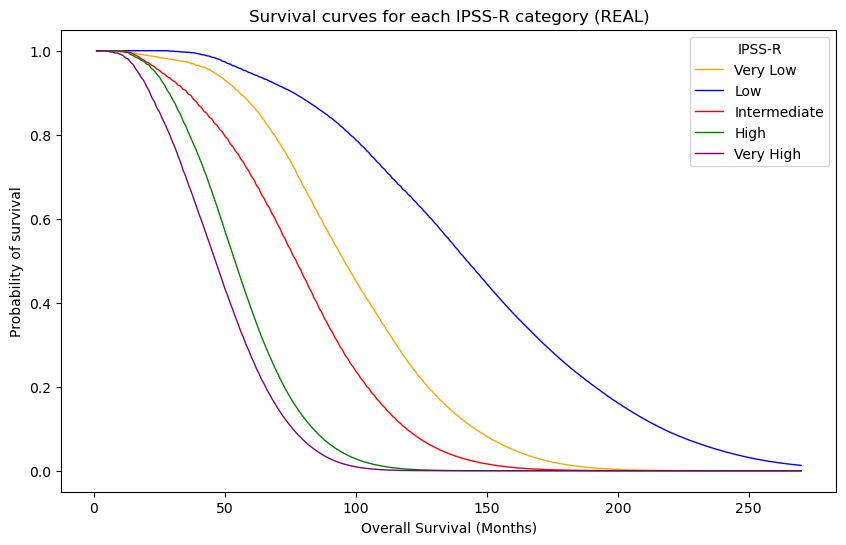

In [151]:
probabilities_vl = very_low_prob
probabilities_l = low_prob
probabilities_i = intermediate_prob
probabilities_h = high_prob
probabilities_vh = very_high_prob

# Ensure all vectors have a maximum length of 270
max_length = 270
vectors = [probabilities_vl, probabilities_l, probabilities_i, probabilities_h, probabilities_vh]
for i in range(len(vectors)):
    if len(vectors[i]) > max_length:
        vectors[i] = vectors[i][:max_length]

# Create a sequence of x values
x_values = np.arange(1, len(vectors[0]) + 1)

# Plot all vectors on the same graph
plt.figure(figsize=(10, 6))

# Plot other vectors
colors = ['orange', 'blue', 'red', 'green', 'purple']  # Different colors for the other vectors
labels = ['Very Low', 'Low', 'Intermediate', 'High', 'Very High']
for i in range(0, 5):
    plt.plot(x_values, vectors[i], label=labels[i], linestyle='-', color=colors[i], linewidth=1)

plt.xlabel('Overall Survival (Months)')
plt.ylabel('Probability of survival')
plt.title('Survival curves for each IPSS-R category (REAL)')
plt.legend(title='IPSS-R', loc='best')
plt.show()


## Differential Privacy

In [208]:
from diffprivlib.mechanisms import Laplace

epsilon_1 = 0.1
epsilon_2 = 1
epsilon_3 = 5

In [209]:
dp_df = data.copy()

dp_df

,BM Blast (%),IPSS-R Cytogenetic Category,Hemoglobin (g/dL),Platelet (G/L),Absolute Neutrophil Count (G/L),IPSS-R,IPSS-R Score,Overall Survival (Months),Patient ID
0,3.0,Good,8.8,406.0,4.65,Low,3.0,69.830137,E-H-100000
1,2.0,Good,9.8,364.0,2.88,Low,2.0,34.290411,E-H-100001
2,15.0,Very-Poor,8.9,35.0,0.49,Very-High,9.5,3.682192,E-H-100002
3,3.0,Good,7.0,708.0,1.56,Int,3.5,62.235616,E-H-100004
4,2.0,Good,11.8,141.0,1.25,Very-Low,1.0,67.758904,E-H-100005
...,...,...,...,...,...,...,...,...,...
3318,12.0,Good,11.5,61.0,0.60,High,5.0,51.484932,I-H-132725
3319,15.0,Good,11.2,383.0,0.50,Int,4.5,27.353425,I-H-132726
3320,5.0,Good,11.3,44.0,1.00,Int,4.0,6.936986,I-H-132727
3321,2.0,Int,8.2,14.0,40.10,Int,4.0,15.419178,I-H-132728


In [210]:
#create a list of the values of the column 'BM Blast (%)'
def get_values(column):
    values = []
    for value in column:
        values.append(value)
    return values

values = get_values(dp_df['BM Blast (%)'])

#add noise to the values of the column 'BM Blast (%)'
def add_noise(values, epsilon):
    noisy_values = []
    for value in values:
        to_append = int(Laplace(epsilon=epsilon, sensitivity=1).randomise(value))
        if to_append < 0:
            to_append = 0
        noisy_values.append(to_append)
    return noisy_values

dp_values_1 = add_noise(values, epsilon_1)
dp_values_2 = add_noise(values, epsilon_2)
dp_values_3 = add_noise(values, epsilon_3)

dp_df['DP-BM Blast (%)'] = dp_values_1

dp_df


,BM Blast (%),IPSS-R Cytogenetic Category,Hemoglobin (g/dL),Platelet (G/L),Absolute Neutrophil Count (G/L),IPSS-R,IPSS-R Score,Overall Survival (Months),Patient ID,DP-BM Blast (%)
0,3.0,Good,8.8,406.0,4.65,Low,3.0,69.830137,E-H-100000,5
1,2.0,Good,9.8,364.0,2.88,Low,2.0,34.290411,E-H-100001,6
2,15.0,Very-Poor,8.9,35.0,0.49,Very-High,9.5,3.682192,E-H-100002,12
3,3.0,Good,7.0,708.0,1.56,Int,3.5,62.235616,E-H-100004,13
4,2.0,Good,11.8,141.0,1.25,Very-Low,1.0,67.758904,E-H-100005,0
...,...,...,...,...,...,...,...,...,...,...
3318,12.0,Good,11.5,61.0,0.60,High,5.0,51.484932,I-H-132725,0
3319,15.0,Good,11.2,383.0,0.50,Int,4.5,27.353425,I-H-132726,4
3320,5.0,Good,11.3,44.0,1.00,Int,4.0,6.936986,I-H-132727,7
3321,2.0,Int,8.2,14.0,40.10,Int,4.0,15.419178,I-H-132728,0


In [211]:
# BM Blast (%) points
BM_points_dp = compute_BM_points(dp_df['DP-BM Blast (%)'])

In [212]:
#create a list of the values of the column 'Hemoglobin (g/dL)'
def get_values(column):
    values = []
    for value in column:
        values.append(value)
    return values

values = get_values(dp_df['Hemoglobin (g/dL)'])

#add noise to the values of the column 'Hemoglobin (g/dL)'
def add_noise(values, epsilon):
    noisy_values = []
    for value in values:
        to_append = Laplace(epsilon=epsilon, sensitivity=1).randomise(value)
        if to_append < 0:
            to_append = 0
        noisy_values.append(to_append)
    return noisy_values

dp_values_1 = add_noise(values, epsilon_1)
dp_values_2 = add_noise(values, epsilon_2)
dp_values_3 = add_noise(values, epsilon_3)

dp_df['DP-Hemoglobin (g/dL)'] = dp_values_1

dp_df


,BM Blast (%),IPSS-R Cytogenetic Category,Hemoglobin (g/dL),Platelet (G/L),Absolute Neutrophil Count (G/L),IPSS-R,IPSS-R Score,Overall Survival (Months),Patient ID,DP-BM Blast (%),DP-Hemoglobin (g/dL)
0,3.0,Good,8.8,406.0,4.65,Low,3.0,69.830137,E-H-100000,5,0.000000
1,2.0,Good,9.8,364.0,2.88,Low,2.0,34.290411,E-H-100001,6,11.989551
2,15.0,Very-Poor,8.9,35.0,0.49,Very-High,9.5,3.682192,E-H-100002,12,4.137013
3,3.0,Good,7.0,708.0,1.56,Int,3.5,62.235616,E-H-100004,13,1.806263
4,2.0,Good,11.8,141.0,1.25,Very-Low,1.0,67.758904,E-H-100005,0,6.574983
...,...,...,...,...,...,...,...,...,...,...,...
3318,12.0,Good,11.5,61.0,0.60,High,5.0,51.484932,I-H-132725,0,4.645362
3319,15.0,Good,11.2,383.0,0.50,Int,4.5,27.353425,I-H-132726,4,13.710198
3320,5.0,Good,11.3,44.0,1.00,Int,4.0,6.936986,I-H-132727,7,16.279159
3321,2.0,Int,8.2,14.0,40.10,Int,4.0,15.419178,I-H-132728,0,6.370598


In [213]:
# BM Blast (%) points
Hemog_points_dp = compute_Hemog_points(dp_df['DP-Hemoglobin (g/dL)'])

In [215]:
#create a list of the values of the column 'Platelet (G/L)'
def get_values(column):
    values = []
    for value in column:
        values.append(value)
    return values

values = get_values(dp_df['Platelet (G/L)'])

#add noise to the values of the column 'Platelet (G/L)'
def add_noise(values, epsilon):
    noisy_values = []
    for value in values:
        to_append = int(Laplace(epsilon=epsilon, sensitivity=1).randomise(value))
        if to_append < 0:
            to_append = 0
        noisy_values.append(to_append)
    return noisy_values

dp_values_1 = add_noise(values, epsilon_1)
dp_values_2 = add_noise(values, epsilon_2)
dp_values_3 = add_noise(values, epsilon_3)

dp_df['DP-Platelet (g/dL)'] = dp_values_1

dp_df


,BM Blast (%),IPSS-R Cytogenetic Category,Hemoglobin (g/dL),Platelet (G/L),Absolute Neutrophil Count (G/L),IPSS-R,IPSS-R Score,Overall Survival (Months),Patient ID,DP-BM Blast (%),DP-Hemoglobin (g/dL),DP-Platelet (g/dL)
0,3.0,Good,8.8,406.0,4.65,Low,3.0,69.830137,E-H-100000,5,0.000000,406
1,2.0,Good,9.8,364.0,2.88,Low,2.0,34.290411,E-H-100001,6,11.989551,366
2,15.0,Very-Poor,8.9,35.0,0.49,Very-High,9.5,3.682192,E-H-100002,12,4.137013,32
3,3.0,Good,7.0,708.0,1.56,Int,3.5,62.235616,E-H-100004,13,1.806263,719
4,2.0,Good,11.8,141.0,1.25,Very-Low,1.0,67.758904,E-H-100005,0,6.574983,141
...,...,...,...,...,...,...,...,...,...,...,...,...
3318,12.0,Good,11.5,61.0,0.60,High,5.0,51.484932,I-H-132725,0,4.645362,64
3319,15.0,Good,11.2,383.0,0.50,Int,4.5,27.353425,I-H-132726,4,13.710198,382
3320,5.0,Good,11.3,44.0,1.00,Int,4.0,6.936986,I-H-132727,7,16.279159,45
3321,2.0,Int,8.2,14.0,40.10,Int,4.0,15.419178,I-H-132728,0,6.370598,20


In [ ]:
# Plateletes points
Hemog_points_dp = compute_Hemog_points(dp_df['DP-Hemoglobin (g/dL)'])

<AxesSubplot:xlabel='Overall Survival (Months)', ylabel='IPSS-R Score'>

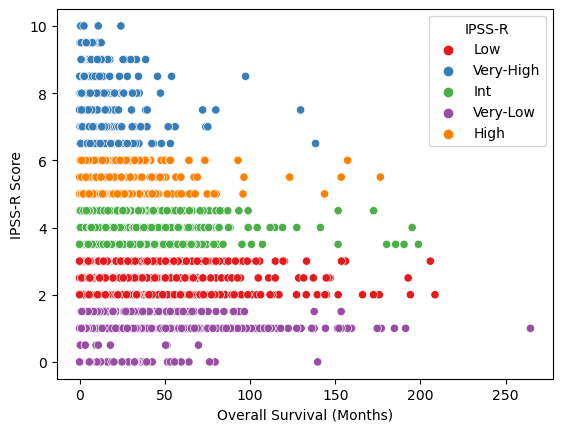

In [216]:
sns.scatterplot(x='Overall Survival (Months)', y='IPSS-R Score', data=df, hue='IPSS-R', palette='Set1')